# Моделирование связи частотного и классического определения вероятности

## Задача: чётная сумма при броске трёх игральных костей

Бросают три шестигранные игральные кости. Какова вероятность того, что сумма выпавших очков – чётное число?

### Классическое определение вероятности

Рассмотрим событие А – сумма выпавших очков при подбрасывании трёх шестигранных игральных костей чётна.

Когда сумма, выпавшая на трёх кубиках, может быть чётной? 
1. На всех трёх гранях выпало чётное число (например, 2 + 4 + 6 = 12). Необходимо выбрать три числа из трёх чётных чисел (2, 4, 6). Они могут повторяться (например, 224), а порядок следования элементов важен (то есть, 246 и 264 – разные комбинации). Это размещение с повторениями: $$ \overline{A{_3^3}}=3^3=27. $$
2. На двух гранях выпало нечётное число, на одной – чётное (например, 1 + 3 + 2 = 6). Необходимо выбрать два числа из трёх нечётных чисел (1, 3, 5) и одно число из трёх чётных чисел (2, 4, 6). При этом возможны следующие случаи (нечётное число – Н, чётное число – Ч): ННЧ, НЧН, ЧНН. Аналогично пункту 1: $$ \overline{A{_3^2}}\cdot \overline{A{_3^1}}\cdot 3=3^2 \cdot 3^1 \cdot 3=81. $$ 

Тогда вероятность, что сумма выпавших очков при подбрасывании трёх шестигранных игральных костей чётна, равна:

$$ P(A)=\frac{27+81}{\overline{A{_6^3}}}=\frac{108}{6^3}=\frac{108}{216}=0.5 $$

### Частотное определение вероятности

Оценим вероятность получить чётную сумму при подбрасывании трёх шестигранных костей, используя от 10 до 10 010 испытаний.

Частота при N = 10010: 0.497


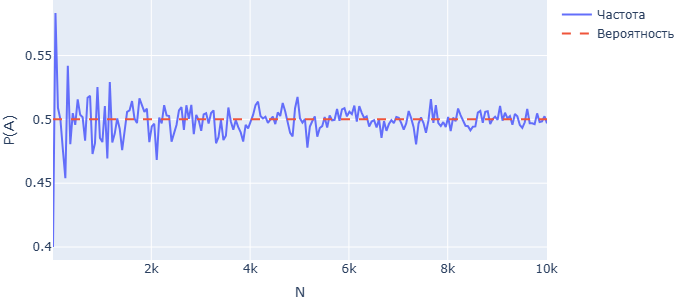

In [15]:
from random import randint
import plotly.graph_objs as go
import numpy as np

def random_combination():
    return [randint(1, 6) for _ in range(3)]

N_values = np.array(range(10, 10011, 50))  
P_A_values = []

for N in N_values:
    N_A = 0
    for _ in range(N):
        comb = random_combination()
        if sum(comb) % 2 == 0:
            N_A += 1
    P_A_values.append(N_A / N)

print(f"Частота при N = {N_values[-1]}: {P_A_values[-1]:.3f}")

P = [0.5] * len(N_values)

fig = go.Figure(layout=dict(width=600, height=300))
fig.update_layout(margin=dict(l=0, t=0, b=0))

fig.add_trace(go.Scatter(x=N_values, y=P_A_values, name='Частота'))
fig.add_trace(go.Scatter(x=N_values, y=P, name='Вероятность', line_dash='dash'))

fig.update_xaxes(title_text='N')
fig.update_yaxes(title_text='P(A)')
fig.show()